<a href="https://colab.research.google.com/github/lucasassara/Data-Science-Fundamentals-Luca-Sassara-FS22/blob/main/Copy_of_Copy_of_CodingTask2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2022-05-15 24:00
- Solutions in lecture on 2022-05-18
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

# **Task 1**

The images were uploaded to Google Drive. The files were retrieved and converted from png format using a for loop. 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
!pip install pillow_heif
from PIL import Image
import pillow_heif
import cv2
from google.colab import drive
drive.mount('/content/drive')




     |████████████████████████████████| 13.1 MB 8.1 MB/s 
Mounted at /content/drive


In [ ]:


for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/Data Science Fundamentals/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.HEIC'])

  print(url_im_name)
  heif_file = pillow_heif.read(url_pre+url_im_name)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_im_name = url_im_name.split('.')[0]+'.png'
  image.save(url_pre+url_im_name, format="png")



IMG_5379.HEIC
IMG_5380.HEIC
IMG_5381.HEIC
IMG_5382.HEIC
IMG_5383.HEIC
IMG_5384.HEIC
IMG_5385.HEIC
IMG_5386.HEIC
IMG_5387.HEIC
IMG_5388.HEIC
IMG_5389.HEIC
IMG_5390.HEIC
IMG_5391.HEIC
IMG_5392.HEIC


# **Task 2**

The colored bins were converted into white segments on a black background through resizing, filtering and thresolding. The conversion process is very slow. 

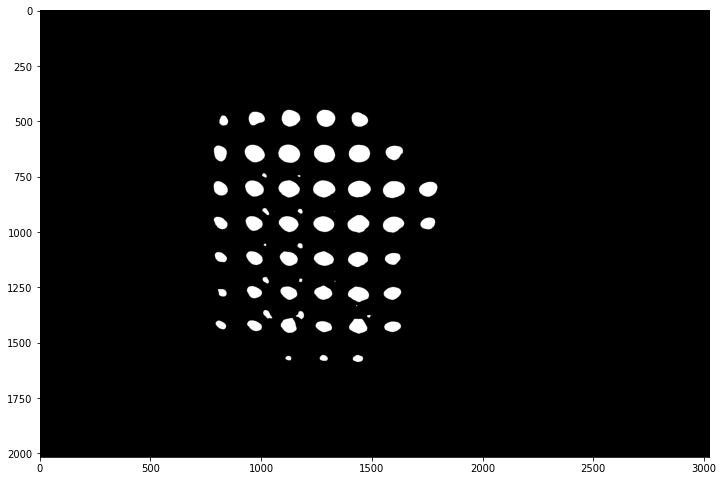

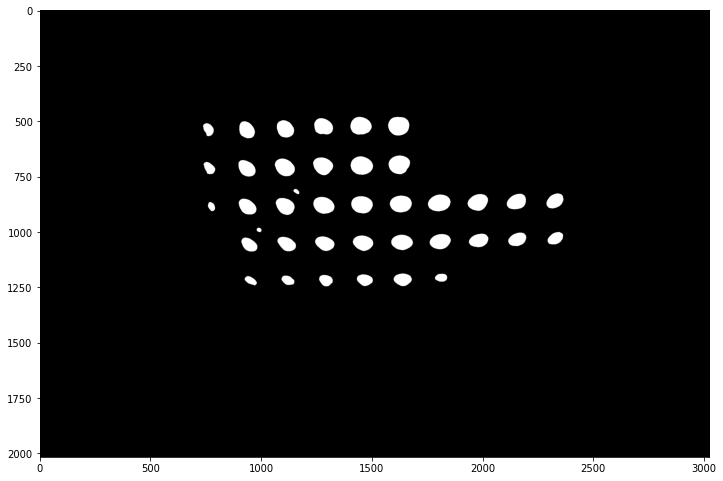

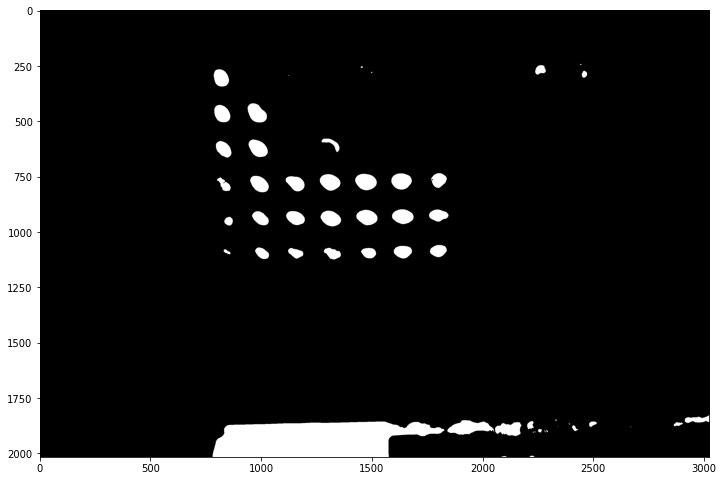

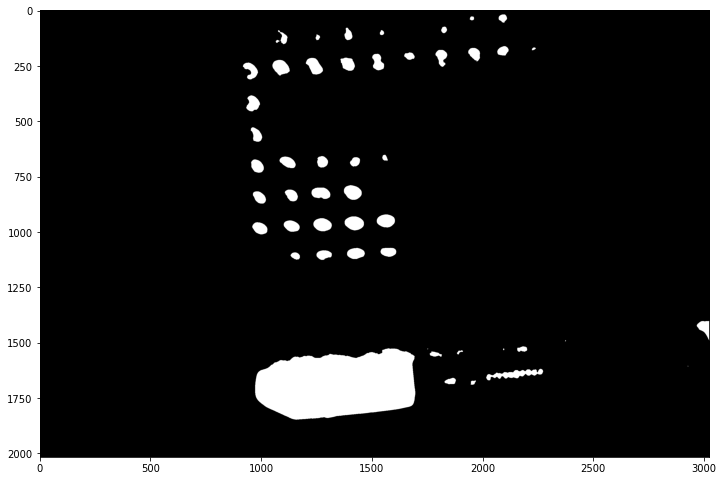

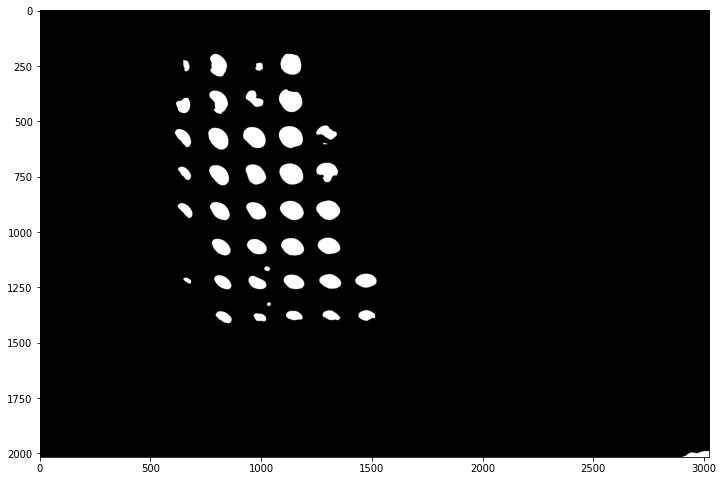

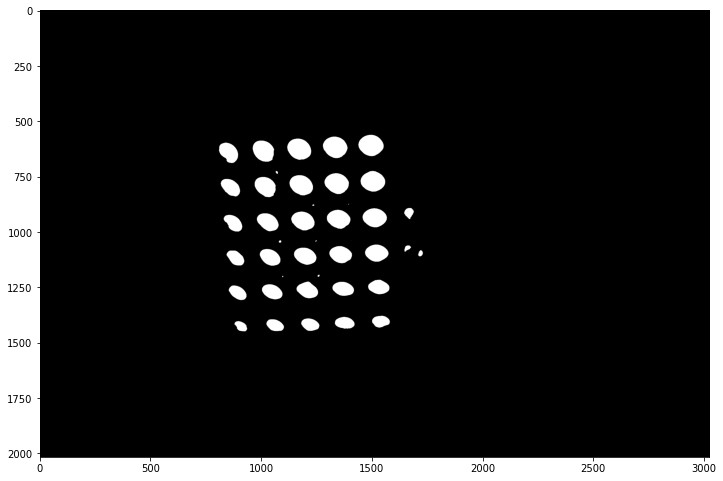

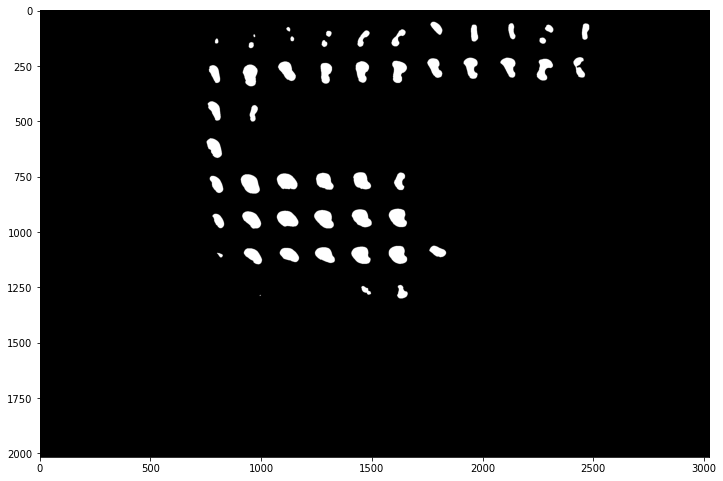

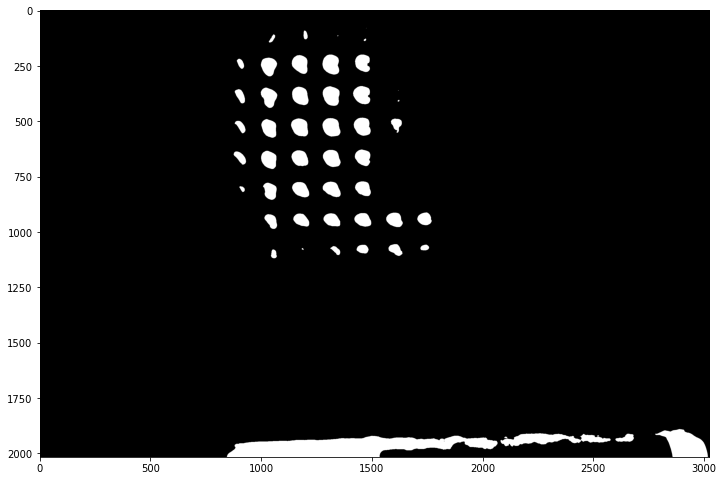

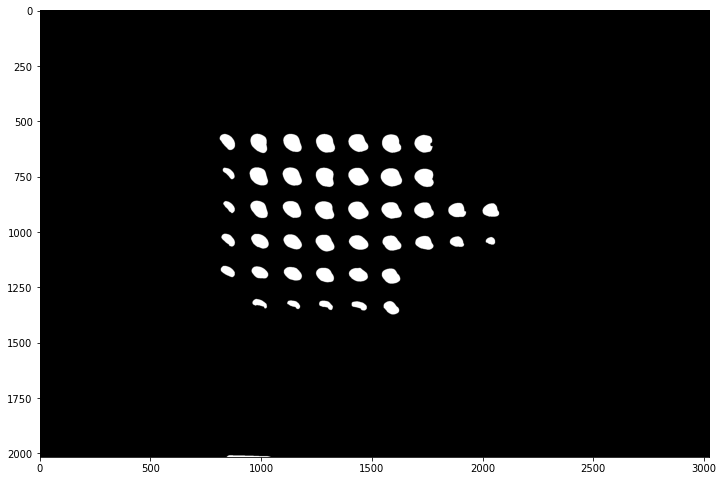

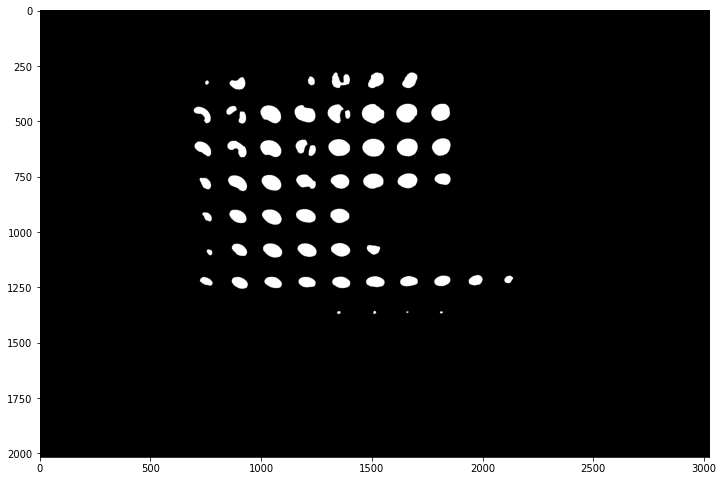

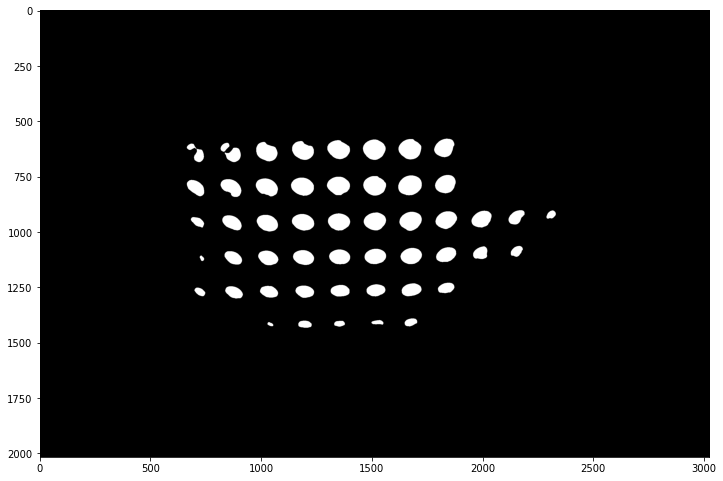

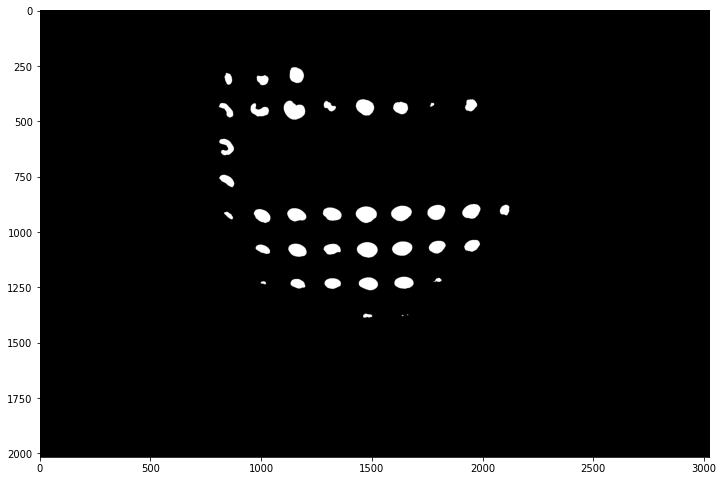

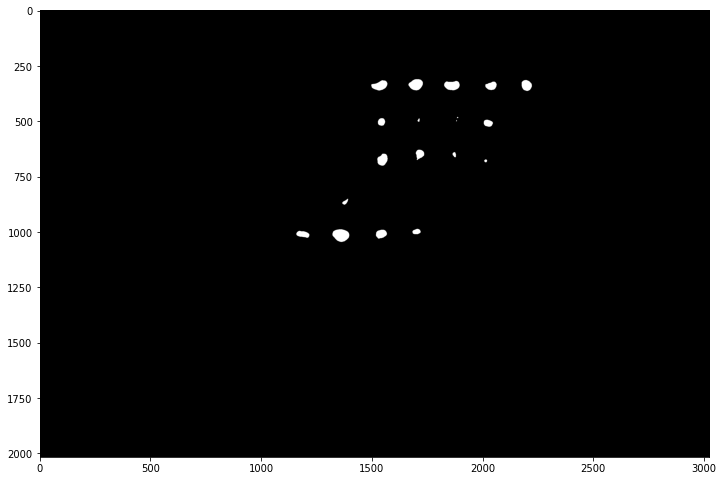

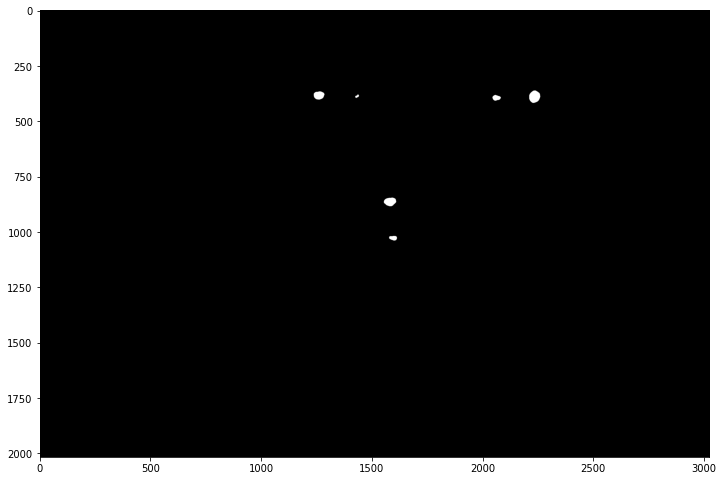

In [ ]:
for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/Data Science Fundamentals/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.png'])
  imageRGB  = io.imread(url_pre+url_im_name)
  image = imageRGB[:,:,2]
  #resizing 
  image = image[image.shape[0]//2:image.shape[0],:]
  #filtering
  image_mean = skf.median(image,selem=skm.disk(20))
  #thresholding
  threshold_manual = 55
  image_threshold = image_mean<threshold_manual
  plt.figure(figsize=(12, 12))
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()

# **Task 3**

The number of bins for one images was counted through a "sliding algorithm". The algorithm slides over the image counting regions with substantial white content. The white regions were determined using the following source - (https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/. (Last Access: 13.05.2022)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
from PIL import Image
import pillow_heif
import glob
import os
import cv2



In [ ]:

url_pre = '/content/drive/MyDrive/Data Science Fundamentals/Images/'
url_name = 'IMG_5379.png' 
image = cv2.imread(url_pre+url_name)
image = image[image.shape[0]//2:image.shape[0],:]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray') 
blur = cv2.GaussianBlur(gray, (11, 11), 0)
#plt.imshow(blur, cmap='gray')
canny = cv2.Canny(blur, 40, 250, 3) 
#plt.imshow(canny, cmap='gray')
dilated = cv2.dilate(canny, (1, 1), iterations=0)
#plt.imshow(dilated, cmap='gray')
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 250, 0), 2)
#plt.imshow(rgb) 
 
print('Number of Bins in',url_name,' : ', len(cnt))




Number of Bins in IMG_5379.png  :  42


# **Task 4**

As only reflections in the liquid of the assays were taken in to consideration, the counted values showed large inacuracy when compared to the correct values. Better image processing using cv.2 would allow for better results. 

In [ ]:
for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/Data Science Fundamentals/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.png'])
  image = cv2.imread(url_pre+url_im_name)
  image = image[image.shape[0]//2:image.shape[0],:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #plt.imshow(gray, cmap='gray')
  blur = cv2.GaussianBlur(gray, (11, 11), 0)
  #plt.imshow(blur, cmap='gray')
  canny = cv2.Canny(blur, 40, 250, 3)
  dilated = cv2.dilate(canny, (1, 1), iterations=0)
  #plt.imshow(dilated, cmap='gray')
  (cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  #plt.imshow(rgb) 
  print(' Number of Bins in', url_im_name,' : ', len(cnt))




 Number of Bins in IMG_5379.png  :  42
 Number of Bins in IMG_5380.png  :  37
 Number of Bins in IMG_5381.png  :  54
 Number of Bins in IMG_5382.png  :  74
 Number of Bins in IMG_5383.png  :  37
 Number of Bins in IMG_5384.png  :  13
 Number of Bins in IMG_5385.png  :  73
 Number of Bins in IMG_5386.png  :  59
 Number of Bins in IMG_5387.png  :  42
 Number of Bins in IMG_5388.png  :  59
 Number of Bins in IMG_5389.png  :  37
 Number of Bins in IMG_5390.png  :  46
 Number of Bins in IMG_5391.png  :  39
 Number of Bins in IMG_5392.png  :  55
